In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import networkx as nx

import syft as sy
from syft.service.action.action_graph_service import ActionGraphService, NodeActionDataUpdate, ExecutionStatus
from syft.service.action.action_graph_service import NodeActionData, NodeType
from syft.service.action.action_graph import InMemoryActionGraphStore, InMemoryGraphConfig, InMemoryStoreClientConfig
from syft.service.action.action_graph import NetworkXBackingStore
from syft.service.context import AuthedServiceContext
from syft.node.credentials import SyftSigningKey, SyftVerifyKey
from syft.service.action.action_graph import Action
from syft.service.action.numpy import NumpyArrayObject, ActionObject
from syft.service.action.action_graph_service import ExecutionStatusPartitionKey
from syft.store.document_store import QueryKeys

print(sy.__version__)


signing_key = SyftSigningKey.generate()
verify_key = signing_key.verify_key
in_mem_graph_config = InMemoryGraphConfig()
networkx_store = NetworkXBackingStore(store_config=in_mem_graph_config)
authed_context = AuthedServiceContext(credentials=signing_key.verify_key)

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/dk/Desktop/projects/PySyft


0.8.1-beta.0


In [2]:
in_mem_graph_store = InMemoryActionGraphStore(in_mem_graph_config)
action_graph_service = ActionGraphService(store=in_mem_graph_store)
labels_dict = {}
G = action_graph_service.store.graph.db

In [3]:
# d = [1,2,3]
action_obj_d = ActionObject.from_obj([1, 2, 3])
action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=action_obj_d)
labels_dict[action_obj_d.id] = "[1, 2 ,3]"

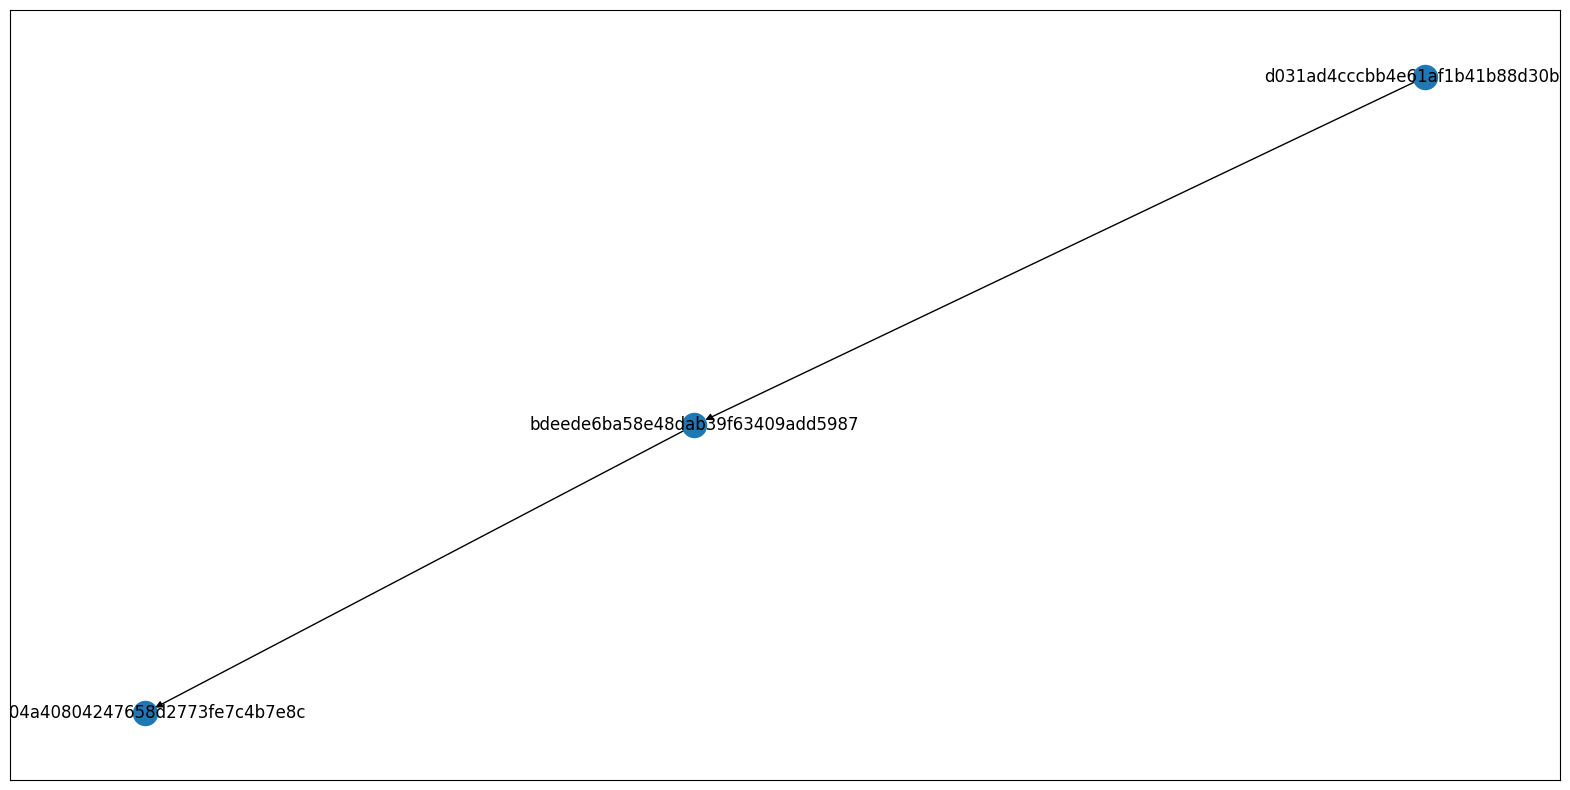

In [4]:
# d = np.array(d)
action2 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_d.syft_lineage_id],
    kwargs={}
)
action_graph_service.add_action(context=authed_context, action=action2)
labels_dict[action2.id] = "np.array"
labels_dict[action2.result_id.id] = "D"

action_graph_service.store.graph.visualize()

In [ ]:
# d.astype('int32')
as_type_action_obj = ActionObject.from_obj('np.int32')
action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=as_type_action_obj)
labels_dict[as_type_action_obj.id] = "np.int32"
action4 = Action(
    path="action.execute",
    op="astype",
    remote_self=action2.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action2.result_id
)
action_graph_service.add_action(context=authed_context, 
                                action=action4)
labels_dict[action4.id] = "astype"

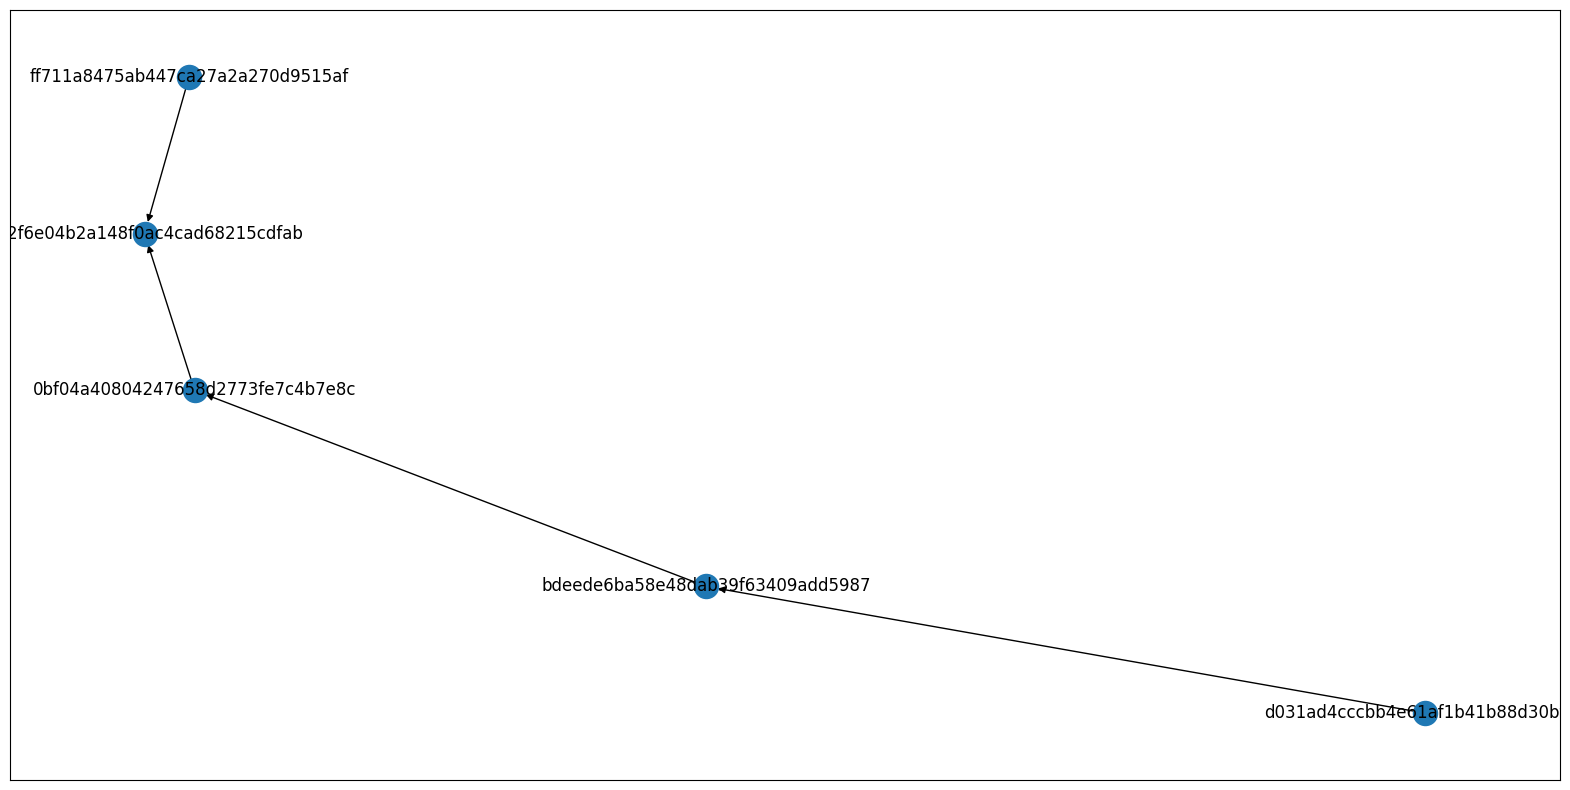

In [6]:
action_graph_service.store.graph.visualize()

In [7]:
# d[2] = 5
idx_action_obj = ActionObject.from_obj(2)
action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=idx_action_obj)
labels_dict[idx_action_obj.id] = "idx=2"
item_val_action_obj = ActionObject.from_obj(5)
action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=item_val_action_obj)
labels_dict[item_val_action_obj.id] = "val=5"
action5 = Action(
    path="action.execute",
    op="__setitem__",
    remote_self=action2.result_id,
    args=[idx_action_obj.syft_lineage_id, 
          item_val_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action2.result_id
)
action_graph_service.add_action(context=authed_context, action=action5)
labels_dict[action5.id] = "__setitem__"

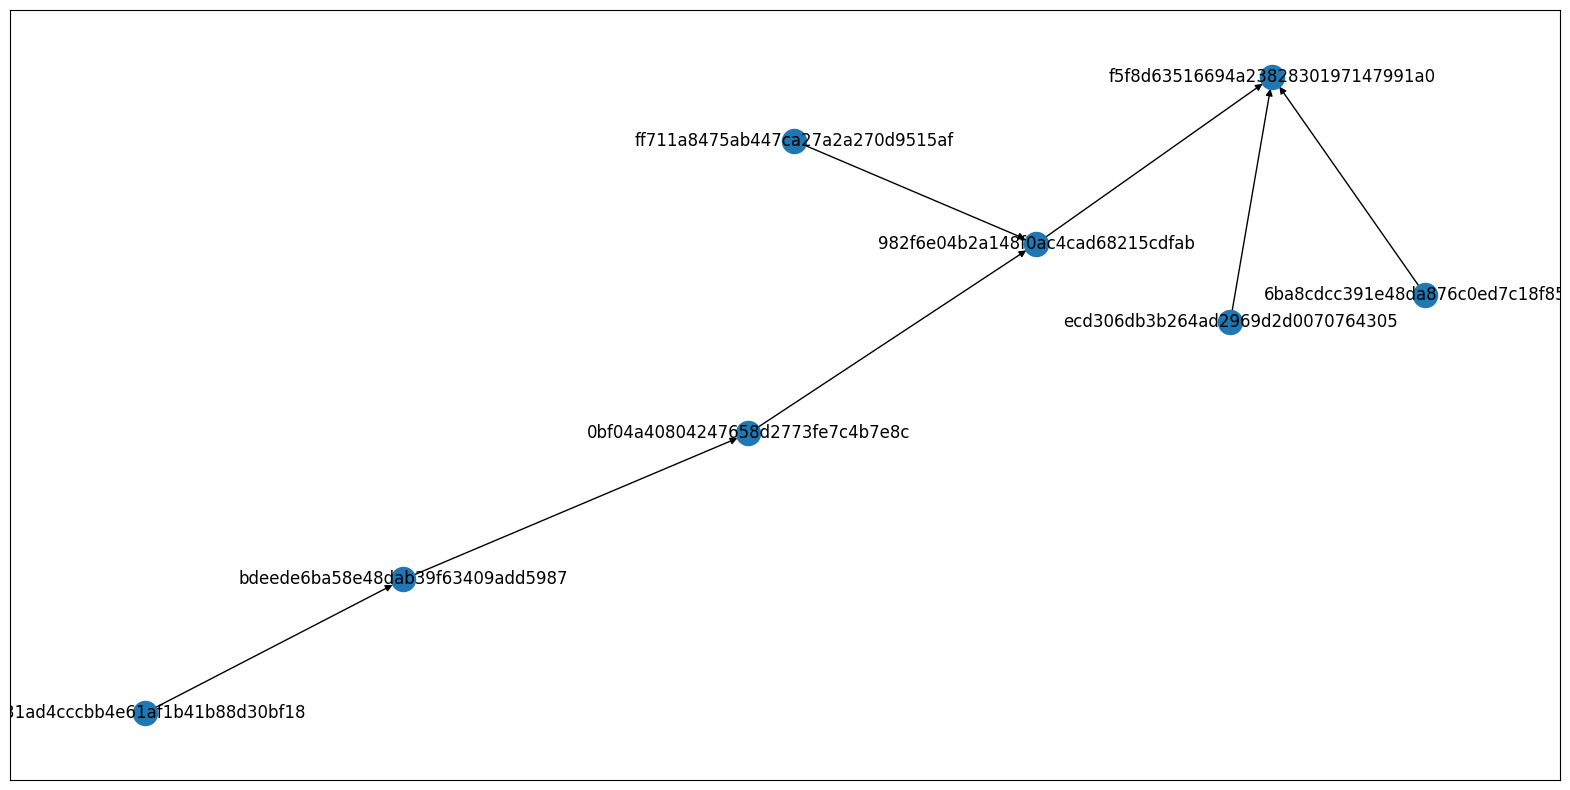

In [8]:
action_graph_service.store.graph.visualize()

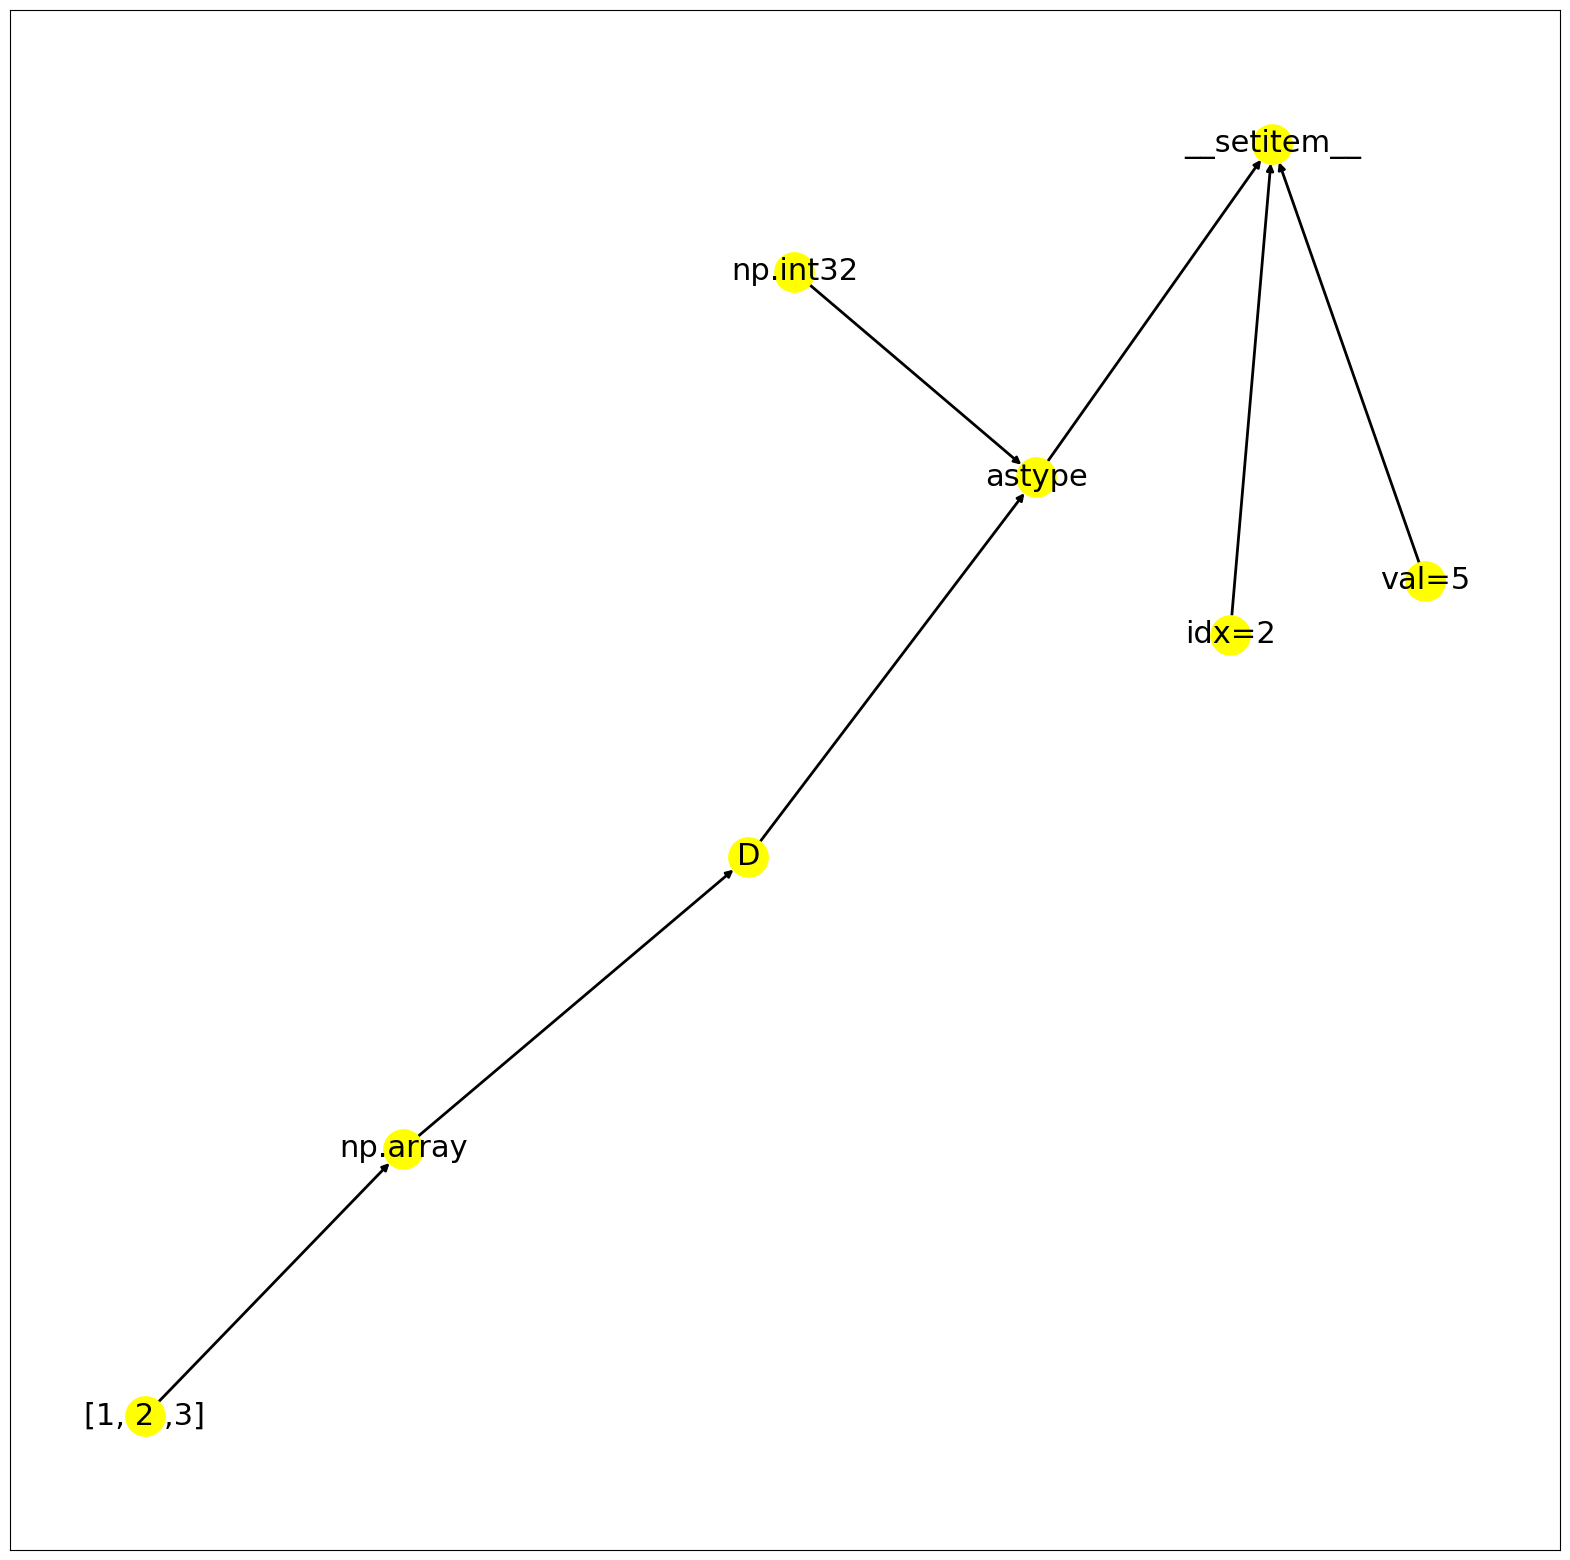

In [9]:
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, seed=3113794652)
# nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx(G, pos=pos, 
                 labels=labels_dict, 
                 with_labels=True, width=2.0, 
                 node_color="yellow", node_size=800, font_size=22)